In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# Load the dataset from a CSV file into a Pandas DataFrame for further data analysis and processing
data = pd.read_csv('Mit_Bith_data.csv')

In [4]:
data.head()

0  195  112  277  192  186  188  191  189  190  ...  189.12  189.13  187.7  \
0  0  112  277  192  186  188  191  189  190  191  ...     189     187    189   
1  0  277  192  186  188  191  189  190  191  189  ...     187     189    192   
2  0  192  186  188  191  189  190  191  189  187  ...     189     192    191   
3  0  186  188  191  189  190  191  189  187  189  ...     192     191    191   
4  0  188  191  189  190  191  189  187  189  188  ...     191     191    191   

   189.14  192.9  191.16  191.17  191.18  191.19  191.20  
0     192    191     191     191     191     191     187  
1     191    191     191     191     191     187     190  
2     191    191     191     191     187     190     192  
3     191    191     191     187     190     192     191  
4     191    191     187     190     192     191     188  

[5 rows x 101 columns]

In [3]:
# Display the first 5 rows of the DataFrame to get a quick overview of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   0  195  112  277  192  186  188  191  189  190  ...  189.12  189.13  187.7  \
0  0  112  277  192  186  188  191  189  190  191  ...     189     187    189   
1  0  277  192  186  188  191  189  190  191  189  ...     187     189    192   
2  0  192  186  188  191  189  190  191  189  187  ...     189     192    191   
3  0  186  188  191  189  190  191  189  187  189  ...     192     191    191   
4  0  188  191  189  190  191  189  187  189  188  ...     191     191    191   

   189.14  192.9  191.16  191.17  191.18  191.19  191.20  
0     192    191     191     191     191     191     187  
1     191    191     191     191     191     187     190  
2     191    191     191     191     187     190     192  
3     191    191     191     187     190     192     191  
4     191    191     187     190     192     191     188  

[5 rows x 101 columns]


In [5]:
# Define the feature matrix X and target vector y
target_column_name = '0'  # Replace with the actual target column name
X = data.drop(columns=[target_column_name])
y = data[target_column_name]


In [6]:
# Check for missing values in X and y
print("Missing values in X:", pd.DataFrame(X).isnull().sum().sum())
print("Missing values in y:", pd.Series(y).isnull().sum())

Missing values in X: 0
Missing values in y: 0


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=0.5, gamma='scale', probability=True)
svm_classifier.fit(X_train, y_train)

SVC(C=0.5, probability=True)

In [12]:
# Predict on the training and test sets
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

In [13]:
# Calculate accuracy scores for SVM
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"SVM Training Accuracy: {train_accuracy:.4f}")
print(f"SVM Test Accuracy: {test_accuracy:.4f}")

SVM Training Accuracy: 0.9967
SVM Test Accuracy: 0.9968


In [20]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_test_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)


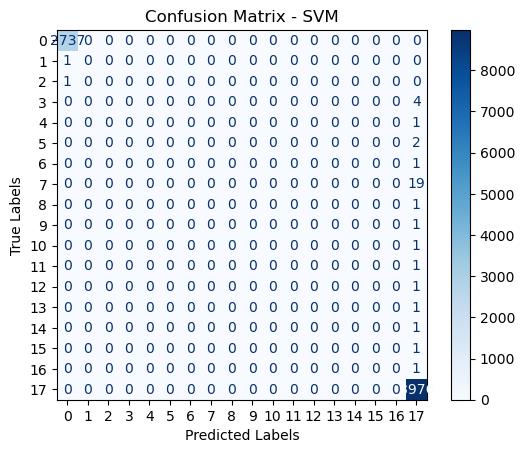

In [21]:
# Set display labels and plot the confusion matrix
disp_svm.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

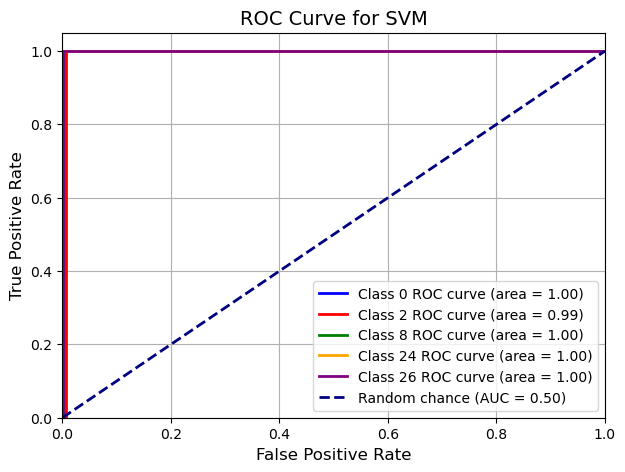

In [62]:
# Import necessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Helper function to plot ROC curves
def plot_roc_curves(fpr, tpr, aucs, class_names, title):
    plt.figure(figsize=(7, 5))
    colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors if you have more classes
    for i, color in zip(range(len(class_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {class_names[i]} ROC curve (area = {aucs[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# For SVM
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_test_pred_proba_svm = svm_classifier.predict_proba(X_test)
fpr_svm, tpr_svm, roc_auc_svm = {}, {}, {}

for i in range(y_test_bin.shape[1]):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_proba_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

plot_roc_curves(fpr_svm, tpr_svm, list(roc_auc_svm.values()), np.unique(y_test), 'ROC Curve for SVM')


In [58]:
# Print Classification Report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_test_pred))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2737
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          33       0.00      0.00      0.00        19
          41       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          94       0.00      0.00      0.00       

C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [23]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# Predict on the training and test sets
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)


In [25]:
# Calculate accuracy scores for Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")

Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy: 0.9968


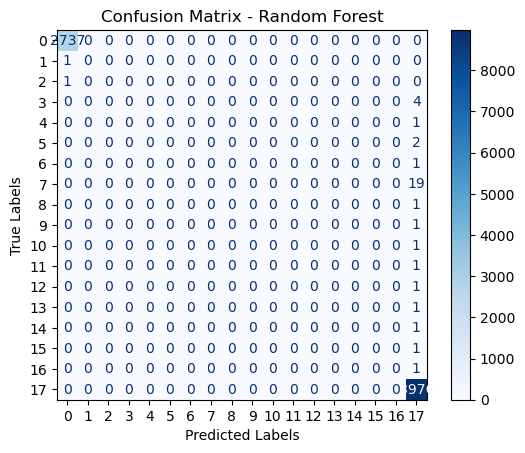

In [27]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<Figure size 700x500 with 0 Axes>

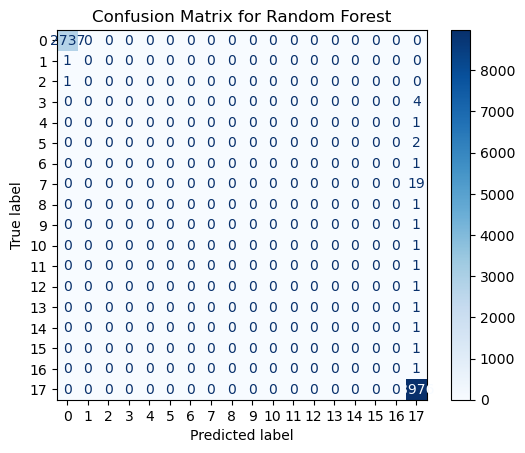

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test contains true labels and y_test_pred contains the predictions of your Random Forest model
y_test_pred_rf = rf_classifier.predict(X_test)  # Use your model to predict on the test set

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

# Create a ConfusionMatrixDisplay object with default labels
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


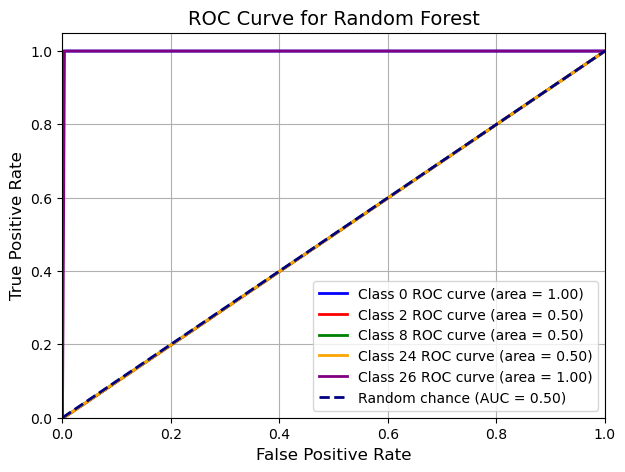

In [64]:
# For Random Forest
y_test_pred_proba_rf = rf_classifier.predict_proba(X_test)
fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}

for i in range(y_test_bin.shape[1]):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_proba_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

plot_roc_curves(fpr_rf, tpr_rf, list(roc_auc_rf.values()), np.unique(y_test), 'ROC Curve for Random Forest')

In [65]:
# Print Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2737
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          33       0.00      0.00      0.00        19
          41       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          94       0.00      0.00      0

C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [66]:
# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Adjust based on number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [40]:
# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/50
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8903 - loss: 0.6214 - val_accuracy: 0.9904 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 2/50
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9855 - loss: 0.0712 - val_accuracy: 0.9933 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 3/50
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0587 - val_accuracy: 0.9939 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 4/50
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0497 - val_accuracy: 0.9939 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 5/50
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0380 - val_accuracy: 0.9952 - val_loss: 0.0266 - learning_rate: 0.0010
Epoch 6/50
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9917 - loss: 0.0393 - val_accuracy: 0.9939 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 7/50
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - l

In [41]:
# Evaluate the model
y_test_pred_lstm = np.argmax(model.predict(X_test_lstm), axis=-1)
test_accuracy_lstm = accuracy_score(y_test, y_test_pred_lstm)
print(f"LSTM Test Accuracy: {test_accuracy_lstm:.4f}")

368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
LSTM Test Accuracy: 0.9959


In [42]:
# Calculate F1 score for LSTM
test_f1_score_lstm = f1_score(y_test, y_test_pred_lstm, average='weighted')
print(f"LSTM Test F1 Score: {test_f1_score_lstm:.4f}")

LSTM Test F1 Score: 0.9956


In [43]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

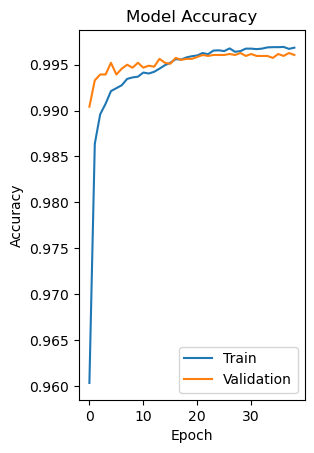

In [44]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

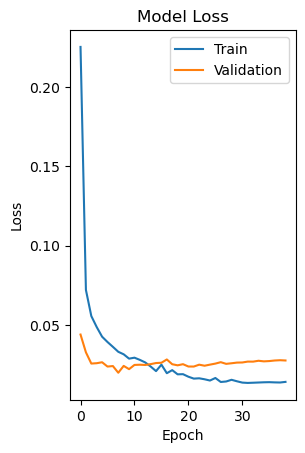

In [45]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

In [50]:
# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

In [52]:
# Compute ROC curve values for LSTM
y_test_pred_proba_lstm = model.predict(X_test_lstm)
fpr_lstm, tpr_lstm, roc_auc_lstm = {}, {}, {}

for i in range(y_test_bin.shape[1]):
    fpr_lstm[i], tpr_lstm[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_proba_lstm[:, i])
    roc_auc_lstm[i] = auc(fpr_lstm[i], tpr_lstm[i])


368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


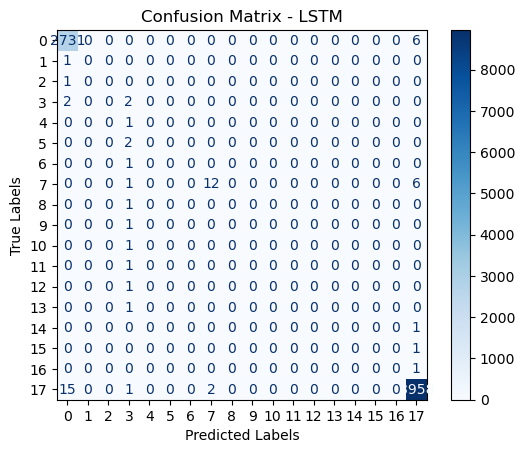

In [55]:
# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_test_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm)
disp_lstm.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

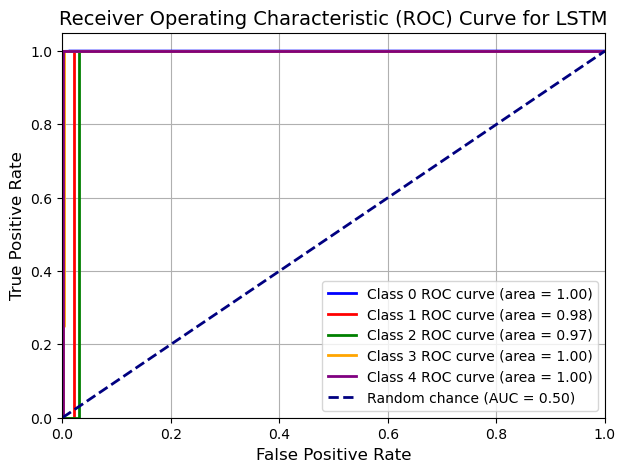

In [68]:
# Plot ROC curve for LSTM
plt.figure(figsize=(7, 5))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors if you have more classes

for i, color in zip(range(y_test_bin.shape[1]), colors):
    plt.plot(fpr_lstm[i], tpr_lstm[i], color=color, lw=2, label=f'Class {i} ROC curve (area = {roc_auc_lstm[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve for LSTM', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [57]:
# Print Classification Report for LSTM
print("Classification Report for LSTM:")
print(classification_report(y_test, y_test_pred_lstm))

Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2737
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          24       0.14      0.50      0.22         4
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          33       0.86      0.63      0.73        19
          41       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         1
          64       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          94       0.00      0.00      0.00      

C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le